In [1]:
# Import dependencies.

import json
import pandas as pd
import numpy as np
import sklearn as skl
import numpy
import datetime
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# From dependency imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sqlalchemy import create_engine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorf

In [2]:
### Configure settings for Relational Database Service, and defining database info in config variable.
jdbc_url="jdbc:postgresql://34.67.52.115/team5k"
config = {'user': 'postgres', 
          "password": "team5kteam5k", 
          "driver":"org.postgresql.Driver",
          "location": "34.67.52.115",
          "db": "team5k",
          "port": "5432"}

In [3]:
### Flag to print Informational message
dmdebug=True

### Creating variable holding postgres info in format "postgres://[user]:[password]@[location]:[port]/[database]".
create_engine_str = ('postgresql://' 
                     + config["user"] 
                     + ":" + config["password"] 
                     + "@" + config["location"] 
                     + ":" + config["port"] 
                     + "/" + config["db"])

In [4]:
# Connecting to Postgres instance.
engine = create_engine(create_engine_str)

In [5]:
# Printing info for table names. 
print (engine.table_names())

['committees', 'candidates', 'education', 'committee_summary_2020', 'six_state_donations', 'donations', 'health_metrics', 'agg_county_votes', 'birth_death_rate', 'postal_codes', 'fec_committee', 'agg_county_donors', 'pres_votes_6t', 'unemployment']


In [6]:
### Get voter data
votes_df = pd.read_sql_query('select * from "agg_county_votes"',con=engine)
votes_df

,index,blue_votes,red_votes,other_votes,total_votes,county,state,election_year,PopPct_Urban,Unemployment,PopDen_Urban,PopPct_Rural,PopDen_Rural,winning_party
0,0,13025,5947,484.0,19456.0,Apache,AZ,2000,25.94,9.0,1080.7,74.06,4.7,democrat
1,1,13360,18180,1701.0,33241.0,Cochise,AZ,2000,63.70,4.5,1933.4,36.30,7.8,republican
2,2,20280,17562,3041.0,40883.0,Coconino,AZ,2000,68.53,4.4,1939.8,31.47,2.3,democrat
3,3,7700,9158,878.0,17736.0,Gila,AZ,2000,58.94,5.2,1625.0,41.06,4.6,republican
4,4,3355,6007,302.0,9664.0,Graham,AZ,2000,53.56,5.4,1430.2,46.44,3.8,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,67,79200,142521,17321.0,239042.0,Waukesha,WI,2016,90.14,3.4,1314.5,9.86,136.2,republican
2016,68,8440,16189,1395.0,26024.0,Waupaca,WI,2016,35.06,3.9,1606.2,64.94,46.2,republican
2017,69,3792,7669,538.0,11999.0,Waushara,WI,2016,10.50,5.0,1403.6,89.50,35.1,republican
2018,70,37054,43448,6642.0,87144.0,Winnebago,WI,2016,86.57,3.6,2269.9,13.43,60.5,republican


In [7]:
# Look at column info
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(votes_df.dtypes)

index              int64
blue_votes         int64
red_votes          int64
other_votes      float64
total_votes      float64
county            object
state             object
election_year      int64
PopPct_Urban     float64
Unemployment     float64
PopDen_Urban     float64
PopPct_Rural     float64
PopDen_Rural     float64
winning_party     object
dtype: object


In [8]:
# Description of the Aggregate Votes dataset
votes_df.describe

<bound method NDFrame.describe of       index  blue_votes  red_votes  other_votes  total_votes     county state  \
0         0       13025       5947        484.0      19456.0     Apache    AZ   
1         1       13360      18180       1701.0      33241.0    Cochise    AZ   
2         2       20280      17562       3041.0      40883.0   Coconino    AZ   
3         3        7700       9158        878.0      17736.0       Gila    AZ   
4         4        3355       6007        302.0       9664.0     Graham    AZ   
...     ...         ...        ...          ...          ...        ...   ...   
2015     67       79200     142521      17321.0     239042.0   Waukesha    WI   
2016     68        8440      16189       1395.0      26024.0    Waupaca    WI   
2017     69        3792       7669        538.0      11999.0   Waushara    WI   
2018     70       37054      43448       6642.0      87144.0  Winnebago    WI   
2019     71       14232      21503       2065.0      37800.0       Wood    

In [9]:
# Index of column names in the Aggregate Votes dataset
votes_df.columns

Index(['index', 'blue_votes', 'red_votes', 'other_votes', 'total_votes',
       'county', 'state', 'election_year', 'PopPct_Urban', 'Unemployment',
       'PopDen_Urban', 'PopPct_Rural', 'PopDen_Rural', 'winning_party'],
      dtype='object')

In [10]:
# Find null values in these data
for column in votes_df.columns:
    print(f"Column {column} has {votes_df[column].isnull().sum()} null values")

Column index has 0 null values
Column blue_votes has 0 null values
Column red_votes has 0 null values
Column other_votes has 100 null values
Column total_votes has 100 null values
Column county has 0 null values
Column state has 0 null values
Column election_year has 0 null values
Column PopPct_Urban has 0 null values
Column Unemployment has 0 null values
Column PopDen_Urban has 225 null values
Column PopPct_Rural has 0 null values
Column PopDen_Rural has 0 null values
Column winning_party has 0 null values


In [11]:
# Print out the total_votes value counts to prepare for binning/bucketing
###Determine what column to choose
total_votes = votes_df.state.value_counts()
total_votes

NC    500
MI    415
WI    360
PA    335
FL    335
AZ     75
Name: state, dtype: int64

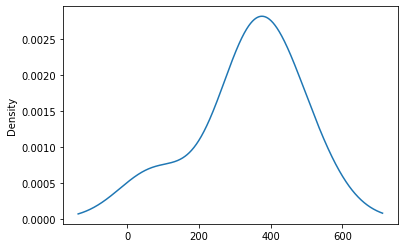

In [12]:
# Visualize the total_votes value counts
###Change once appropriate column is chosen
total_votes.plot.density()

In [13]:
# Generate our categorical variable list
votes_cat = votes_df.dtypes[votes_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
votes_df[votes_cat].nunique()

county           355
state              6
winning_party      2
dtype: int64

In [14]:
#Create numeric and categorical values
numeric_columns = ['blue_votes', 'red_votes', 'other_votes', 'total_votes', 'election_year',
                   'PopPct_Urban', 'Unemployment','PopDen_Urban', 'PopPct_Rural',
                   'PopDen_Rural']

category_columns = ['county', 'state','winning_party']

In [15]:
votes_df.dropna(inplace=True)

In [16]:
#Create X value
X = votes_df[numeric_columns].merge(pd.get_dummies(votes_df[category_columns]), left_index=True, right_index=True)
X

,blue_votes,red_votes,other_votes,total_votes,election_year,PopPct_Urban,Unemployment,PopDen_Urban,PopPct_Rural,PopDen_Rural,...,county_York,county_Yuma,state_AZ,state_FL,state_MI,state_NC,state_PA,state_WI,winning_party_democrat,winning_party_republican
0,13025,5947,484.0,19456.0,2000,25.94,9.0,1080.7,74.06,4.7,...,0,0,1,0,0,0,0,0,1,0
1,13360,18180,1701.0,33241.0,2000,63.70,4.5,1933.4,36.30,7.8,...,0,0,1,0,0,0,0,0,0,1
2,20280,17562,3041.0,40883.0,2000,68.53,4.4,1939.8,31.47,2.3,...,0,0,1,0,0,0,0,0,1,0
3,7700,9158,878.0,17736.0,2000,58.94,5.2,1625.0,41.06,4.6,...,0,0,1,0,0,0,0,0,0,1
4,3355,6007,302.0,9664.0,2000,53.56,5.4,1430.2,46.44,3.8,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,79200,142521,17321.0,239042.0,2016,90.14,3.4,1314.5,9.86,136.2,...,0,0,0,0,0,0,0,1,0,1
2016,8440,16189,1395.0,26024.0,2016,35.06,3.9,1606.2,64.94,46.2,...,0,0,0,0,0,0,0,1,0,1
2017,3792,7669,538.0,11999.0,2016,10.50,5.0,1403.6,89.50,35.1,...,0,0,0,0,0,0,0,1,0,1
2018,37054,43448,6642.0,87144.0,2016,86.57,3.6,2269.9,13.43,60.5,...,0,0,0,0,0,0,0,1,0,1


In [17]:
# Create X/y
X = X.fillna(0)
y = votes_df['total_votes']
###X.isnull().sum().values.any()

In [18]:
# Split X and y into training and testing sets
###X = X.drop("total_votes", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Create a StandardScaler or MinMax Scaler instance
###scaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the StandardScaler
#X_scaler = scaler.fit(X_train)
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define the model - deep neural net
nn_model = tf.keras.models.Sequential()

In [21]:
# Activate Relu modeling
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
# Activate linear modeling
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [23]:
# Look at model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 680)               231880    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 681       
Total params: 232,561
Trainable params: 232,561
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Use optimizer to compile the errors
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [25]:
# Fit model and run epochs
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
1281/1281 [==============================] - 1s 428us/sample - loss: 23275024997.9204
Epoch 2/100
1281/1281 [==============================] - 0s 142us/sample - loss: 23272894932.3341
Epoch 3/100
1281/1281 [==============================] - 0s 174us/sample - loss: 23268213754.8041
Epoch 4/100
1281/1281 [==============================] - 0s 194us/sample - loss: 23260318530.0484
Epoch 5/100
1281/1281 [==============================] - 0s 215us/sample - loss: 23249283294.1140
Epoch 6/100
1281/1281 [==============================] - 0s 168us/sample - loss: 23234880290.1733
Epoch 7/100
1281/1281 [==============================] - 0s 143us/sample - loss: 23216943516.0781
Epoch 8/100
1281/1281 [==============================] - 0s 181us/sample - loss: 23195835181.7642
Epoch 9/100
1281/1281 [==============================] - 0s 163us/sample - loss: 23171026826.4918
Epoch 10/100
1281/1281 [==============================] - 0s 142us/sample - loss: 23143994405.5691
Epoch 11/100
1281/1

1281/1281 [==============================] - 0s 185us/sample - loss: 18284152277.2334
Epoch 84/100
1281/1281 [==============================] - 0s 180us/sample - loss: 18215345226.3419
Epoch 85/100
1281/1281 [==============================] - 0s 238us/sample - loss: 18145583331.6909
Epoch 86/100
1281/1281 [==============================] - 0s 209us/sample - loss: 18082119235.7408
Epoch 87/100
1281/1281 [==============================] - 0s 223us/sample - loss: 18017931831.9813
Epoch 88/100
1281/1281 [==============================] - 0s 197us/sample - loss: 17955898699.7034
Epoch 89/100
1281/1281 [==============================] - 0s 251us/sample - loss: 17892373236.6589
Epoch 90/100
1281/1281 [==============================] - 0s 161us/sample - loss: 17830576379.7533
Epoch 91/100
1281/1281 [==============================] - 0s 169us/sample - loss: 17768062133.4083
Epoch 92/100
1281/1281 [==============================] - 0s 139us/sample - loss: 17706562194.1046
Epoch 93/100
1281/1281 

In [26]:
# Create a variables for test/train predictions
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [27]:
# Print training score
r2_score(y_train, y_train_pred)

0.0255554912486462

In [28]:
# Print testing score
r2_score(y_test, y_test_pred)

0.0009373337815083982

In [29]:
# Look at sequential model info
deep_model = tf.keras.models.Sequential()

In [30]:
# Run with relu
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [31]:
# Run relu, without column details
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))

In [32]:
# Run linear model density
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [33]:
# Print summary
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 680)               231880    
_________________________________________________________________
dense_3 (Dense)              (None, 680)               463080    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 681       
Total params: 695,641
Trainable params: 695,641
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile loss info
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [35]:
# Run deep model epoch
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
1281/1281 [==============================] - 1s 833us/sample - loss: 23266777853.0523
Epoch 2/100
1281/1281 [==============================] - 1s 567us/sample - loss: 23122504308.3091
Epoch 3/100
1281/1281 [==============================] - 1s 508us/sample - loss: 22436901781.6831
Epoch 4/100
1281/1281 [==============================] - 1s 459us/sample - loss: 21245132707.6721
Epoch 5/100
1281/1281 [==============================] - 1s 500us/sample - loss: 19967362234.8540
Epoch 6/100
1281/1281 [==============================] - 1s 563us/sample - loss: 18469149794.8852
Epoch 7/100
1281/1281 [==============================] - 1s 399us/sample - loss: 16975714121.5425s - loss: 16916455136.000
Epoch 8/100
1281/1281 [==============================] - 1s 392us/sample - loss: 15803788941.0898
Epoch 9/100
1281/1281 [==============================] - 1s 482us/sample - loss: 14739596109.2397
Epoch 10/100
1281/1281 [==============================] - 1s 515us/sample - loss: 13795946199

1281/1281 [==============================] - 1s 396us/sample - loss: 159260782.4106
Epoch 84/100
1281/1281 [==============================] - 1s 449us/sample - loss: 157179475.2802
Epoch 85/100
1281/1281 [==============================] - 1s 391us/sample - loss: 155201184.3240
Epoch 86/100
1281/1281 [==============================] - 1s 424us/sample - loss: 146563850.9721s - loss: 116681589.8
Epoch 87/100
1281/1281 [==============================] - 1s 399us/sample - loss: 145072708.1550
Epoch 88/100
1281/1281 [==============================] - 1s 418us/sample - loss: 139810084.2838
Epoch 89/100
1281/1281 [==============================] - 1s 475us/sample - loss: 135678468.5731
Epoch 90/100
1281/1281 [==============================] - 1s 532us/sample - loss: 131684412.9610
Epoch 91/100
1281/1281 [==============================] - 1s 594us/sample - loss: 127416514.3100
Epoch 92/100
1281/1281 [==============================] - 1s 549us/sample - loss: 125088076.6085
Epoch 93/100
1281/1281

In [36]:
# Create training and testing predication variables
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [37]:
# Check training r score
r2_score(y_train, y_train_pred)

0.9943976716444173

In [38]:
# Checking testing r score
r2_score(y_test, y_test_pred)

0.9888278378644526